In [67]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(style="ticks", palette="muted")

In [2]:
# hidden probabilities
means = np.array([0.3, 0.6, 0.5])


rnd = np.random.RandomState(7)

## Greedy Algorithm

In [3]:
def pull_lever(machine, means, S, F):
    # draw uniform random sample
    p = rnd.random_sample()
    if p < means[machine]:
        S[machine] += 1
    else:
        F[machine] += 1
        

In [4]:
def greedy_algorithm(num_trials, means):
    """Greedy algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):
        for i in range(N):
            probs[i] = (S[i] + 1)/(S[i] + F[i] + 1)
            
        # choose the most likely machine
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

## e-greedy algorithm

In [5]:
def e_greedy_algorithm(num_trials, means, epsilon=0.0):
    """Greedy algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):

        p = rnd.random_sample()
    
        for i in range(N):
            probs[i] = (S[i] + 1)/(S[i] + F[i] + 1)
            
        # epsilon number of times choose a random machine
        if p < epsilon:
            machine = rnd.randint(0, N)
            
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

## Thompson sampling

In [6]:
def thompson_algorithm(num_trials, means):
    """Thompson sampling algorithm"""

    N = len(means)
    
    # current probabilities
    probs = np.zeros(N)

    # number of successes for each machine
    S = np.zeros(N, dtype=np.int)

    # number of failures for each machine
    F = np.zeros(N, dtype=np.int)

    for trial in range(num_trials):
        for i in range(N):
            probs[i] = rnd.beta(S[i] + 1, F[i] + 1)
            
        # choose the most likely machine
        machine = np.argmax(probs)
        pull_lever(machine, means, S, F)
        
    return S, F

In [7]:
means = np.array([0.06, 0.00, 0.06, 0.0, 0.06])

num_trials = 10000

gS, gF = greedy_algorithm(num_trials, means)

eS, eF = e_greedy_algorithm(num_trials, means, 0.05)

tS, tF = thompson_algorithm(num_trials, means)

print(sum(gS))
print(sum(eS))
print(sum(tS))

587
615
610


In [8]:
N = len(means)

num_trials = 10

total_wins = 0

# current probabilities
probs = np.zeros(N)

# number of successes for each machine
S = np.zeros(N, dtype=np.int)

# number of failures for each machine
F = np.zeros(N, dtype=np.int)


# number of wins at each trial number
wins = np.zeros(num_trials)

for trial in range(num_trials):
    print("Trial {}".format(trial))
    for i in range(N):
        
        # draw from random sample
        probs[i] = rnd.beta(S[i]+1, F[i]+1)
        
    print(probs)
    machine = np.argmax(probs)
    print("Playing machine {}".format(machine))
    
    # draw from a random uniform distribution
    p = rnd.random_sample()
    if p < means[machine]:
        print(" -- win!")
        S[machine] += 1
        total_wins += 1
    else:
        print(" -- lose")
        F[machine] += 1
        
    wins[trial] = (total_wins)/(trial+1)
        
print("Total wins {}".format(total_wins))

Trial 0
[0.31979395 0.12852951 0.35264603 0.64408588 0.42496998]
Playing machine 3
 -- lose
Trial 1
[0.95187078 0.59776216 0.90710639 0.2321917  0.59262068]
Playing machine 0
 -- lose
Trial 2
[0.32925    0.76793766 0.99554325 0.5417202  0.83339054]
Playing machine 2
 -- lose
Trial 3
[0.14443602 0.63692084 0.71448289 0.03018422 0.90441424]
Playing machine 4
 -- lose
Trial 4
[0.63018294 0.32989352 0.5144548  0.58543189 0.48173446]
Playing machine 0
 -- lose
Trial 5
[0.01349733 0.85883257 0.51150389 0.25107759 0.04676256]
Playing machine 1
 -- lose
Trial 6
[0.62086908 0.1268932  0.05835749 0.16966781 0.57763076]
Playing machine 0
 -- lose
Trial 7
[0.08452486 0.08237082 0.23131102 0.55324013 0.58551197]
Playing machine 4
 -- lose
Trial 8
[0.30113391 0.42813128 0.418414   0.91633635 0.37467911]
Playing machine 3
 -- lose
Trial 9
[0.06510216 0.35423068 0.38231835 0.09242281 0.0275634 ]
Playing machine 2
 -- lose
Total wins 0


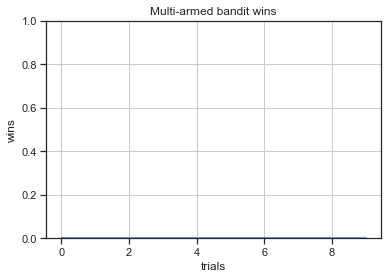

In [9]:
fig, ax = plt.subplots()
ax.plot(wins)

ax.set(xlabel='trials', ylabel='wins',
       title='Multi-armed bandit wins')
ax.grid()
ax.set_ylim([0,1.0])

# fig.savefig("test.png")
plt.show()

In [10]:
print(probs)

[0.06510216 0.35423068 0.38231835 0.09242281 0.0275634 ]


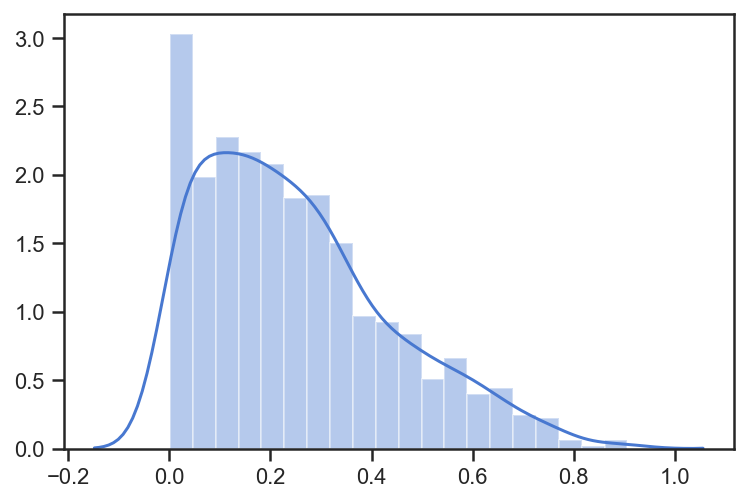

In [68]:
data = [np.random.beta(x+1, y+1, 1000) for x, y, in zip(S, F)]

sns.distplot(data[4], bins=20, kde=True)

In [12]:

# sns.set(color_codes=True)
# sns.set_context('paper')  #Everything is larger


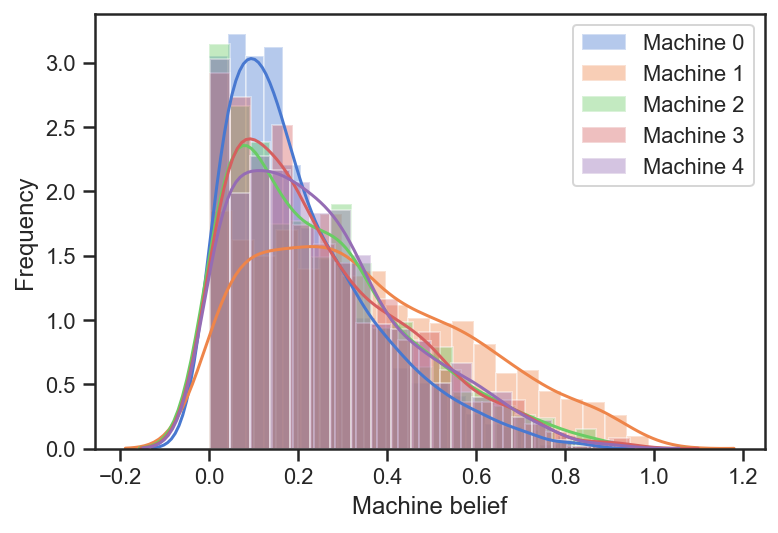

In [69]:
for i in range(N):
    ax = sns.distplot(data[i],
                     bins=20,
                     kde=True,
                     label='Machine {}'.format(i),
                     )


ax.set(xlabel='Machine belief', ylabel='Frequency')
ax.legend()
plt.savefig('foo.svg')

In [52]:
def plot_beliefs(e):
    data = [np.random.beta(x+1, y+1, 1000) for x, y, in zip(e.S, e.F)]
    fig = plt.figure()
    for i in range(e.N):
        ax = sns.distplot(data[i],
                         bins=20,
                         kde=True,
                         label='Machine {}'.format(i),
                         )
        
    ax.set(xlabel='Machine belief', ylabel='Frequency')
    ax.legend()

In [57]:
class MAB_Experiment(object):
    """Multi-armed bandit"""
    def __init__(self, priors):
        self.priors = priors
        self.N = len(priors)
        self.S = np.zeros(self.N, dtype=np.int)
        self.F = np.zeros(self.N, dtype=np.int)
        self.trial = 0
        
    def pull(self, machine):
        
        self.trial += 1
        
        # draw uniform random sample
        p = rnd.random_sample()
        if p < means[machine]:
            self.S[machine] += 1
        else:
            self.F[machine] += 1
            
    def solve(self, solver, n_trials):
        for i in range(n_trials):
            machine = solver(self)
            self.pull(machine)

def greedy(e):
    probs = np.zeros(e.N)
    for i in range(e.N):
        probs[i] = (e.S[i] + 1)/(e.F[i] + 1)
    
    return np.argmax(probs)
    
        
def egreedy(e, epsilon=0.05):
    probs = np.zeros(e.N)
    for i in range(e.N):
        probs[i] = (e.S[i] + 1)/(e.F[i] + 1)
        
    m = np.argmax(probs)
    
    p = rnd.random_sample()
    if p < epsilon:
        r = rnd.randint(0, e.N)
        r = r if r !=m else (r + 1) % e.N
    
    return m
            
def thompson(e):
    """Thompson sampling algorithm"""
    probs = np.zeros(e.N)
    for i in range(e.N):
        # draw a sample from the beta distribution
        probs[i] = rnd.beta(e.S[i] + 1, e.F[i] + 1)
    
    return np.argmax(probs)

n_trials = 5000    
means = np.array([0.05, 0.2, 0.1])

a = MAB_Experiment(means)
a.solve(greedy, n_trials)
print("Greedy sampling")
print(a.S)
print(a.F)

c = MAB_Experiment(means)
c.solve(egreedy, n_trials)
print("E-Greedy")
print(c.S)
print(c.F)

b = MAB_Experiment(means)
b.solve(thompson, n_trials)
print("Thompson sampling")
print(b.S)
print(b.F)



Greedy sampling
[  2   1 494]
[  28   18 4457]
E-Greedy
[   0 1032    0]
[   7 3954    7]
Thompson sampling
[  1 933  17]
[  40 3873  136]


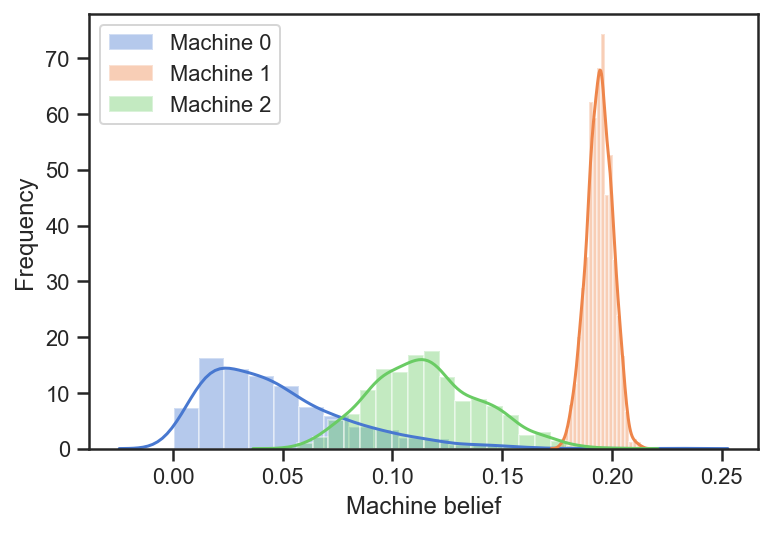

In [70]:
plot_beliefs(b)